In [1]:
from collections import Counter
from nltk.stem.porter import *
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
import random

import emoji
import json
import re

In [2]:
#listing stopwords for hindi and english and combining into a single list

HINDI_STOPWORDS = ['अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'अंदर', 'आदि', 'आप', 'इत्यादि', 'इन ', \

                   'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', \

                   'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', \

                   'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर', 'करता', 'करते', 'करना', \

                   'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', \

                   'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', \

                   'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', \

                   'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', \

                   'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', \

                   'न', 'नके', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', \

                   'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', \

                   'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', \

                   'लिए', 'लिये', 'लेकिन', 'व', 'वग़ैरह', 'वर्ग', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', \

                   'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'संग', \

                   'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'ह, ोने']

STOPWORDS = STOPWORDS.union(HINDI_STOPWORDS) #combined list of hindi and english stop words

In [3]:
def removePattern(text, pattern):

    r = re.findall(pattern, text)

    for i in r:

        text = re.sub(i, '', text)

    return text

In [4]:
def preprocessTweet(tweet_text, only_english=False, stemming=False, remove_more_than=3):

    """

    Function to perform various pre-processing steps on  

    tweet text



    Parameters

    ----------

    only_english : bool

        removes characters from other languages when set to True;

        defaults to False

    

    remove_more_than : int

        remove words more than three characters

    

    stemming : bool

        performs stemming if set to True; defaults to False

        

    tweet_text : str

        < 280 character string of text

    

    Returns

    -------

    tweet_text

        processed tweet

    """

    

    tweet_text = tweet_text.lower()

    tweet_text = removePattern(tweet_text, "@[\w]*") # remove twitter handles

    tweet_text = removePattern(tweet_text, "&[\w]*") # remove &amp

    tweet_text = re.sub('[!@$:).;/#,*$?।&"]', '', tweet_text) # remove special characters, punctuations

    

    if only_english:

        tweet_text = tweet_text.encode('ascii', 'ignore').decode('ascii') # remove emojis and other languages

    else:

        tweet_text = emoji.get_emoji_regexp().sub(u'', tweet_text) # just remove emojis

    

    if stemming:

        stemmer = PorterStemmer()

        tweet_text = ' '.join([stemmer.stem(word).strip() for word in tweet_text.split() \

                               if len(word)>=remove_more_than and word not in STOPWORDS]) # removing stems, short words and stop words

    else:

        tweet_text = ' '.join([word.strip() for word in tweet_text.split() \

                               if len(word)>=remove_more_than and word not in STOPWORDS]) # removing short words and stop words

    

    return tweet_text

In [5]:
"""
reading tweets from ndjson. if your input is different, the point is to read each line ,
do the preprocessing and appending everything into a singel string. Then split the string at whitespaces,
to tokenize. 
"""

'\nreading tweets from ndjson. if your input is different, the point is to read each line ,\ndo the preprocessing and appending everything into a singel string. Then split the string at whitespaces,\nto tokenize. \n'

In [7]:
#Code is written for taking tweets from an ndjson dump and pre-processing the tweet text. Could be suitably changed if
#tweets are stored in some other format.

if __name__ == '__main__':

    

    words = ""

    with open('/path-to-ndjson-file/ec_tweets.ndjson', 'r') as file: #replace with the relevant file that you are dealing with

        for line in tqdm(file):

            status = json.loads(line.strip())

            

            if 'full_text' in status:

                words += preprocessTweet(status['full_text'])

            elif 'text' in status:

                words += preprocessTweet(status['text'])


40917it [00:23, 1733.50it/s]


In [8]:
print(type(words))
print(len(words))

<class 'str'>
3132230


In [9]:
wordlist =words.split() #splitting at white spaces. no special tokenizing function.

len(wordlist)

405461

In [10]:
#creating a dictionary of all the words with values as their counts. 

wordfreq = {}

for w in tqdm(wordlist):
  
  if w in wordfreq.keys():
    wordfreq[w] +=1 
  else:
    wordfreq[w] = 1

100%|██████████| 405461/405461 [00:00<00:00, 974083.29it/s]


In [91]:
poplist = [''197198''] #if you want to pop some unnecessary items (like some unwanted number or words). Not necessary otherwise.

for i in poplist:
    wordfreq.pop(i)

In [13]:
"""
pass on the dictionary to generate_from_frequencies(). There are other methods as well, but this methods 
gives us some control on how we want to tokenize. instead of depnding on the library's inherent tokenization
and splitting routine.

specify the fontpath and the height,width, among other things
(check this link for other parameters, which are optional: http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

the font should be able to deal with unicode range of characters that are in the script. I have used chandas.ttf
in my code and following is an example. 


wordcloud = WordCloud(font_path = '/home/xyz/abc/chandas.ttf',width = )
"""

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
   return "hsl(0, 0%%, %d%%)" % random.randint(45, 60)


#specify the font path. choose a font that deals with both devnagri and roman script.If a different language, then change the font accordingly.

wordcloud = WordCloud(font_path = '/path-to-font/chandas.ttf',width = 1080, height = 960,
              background_color ='black',
              max_words=100,
              collocations=False,
              min_font_size = 5).generate_from_frequencies(wordfreq)

wordcloud.recolor(color_func=grey_color_func)

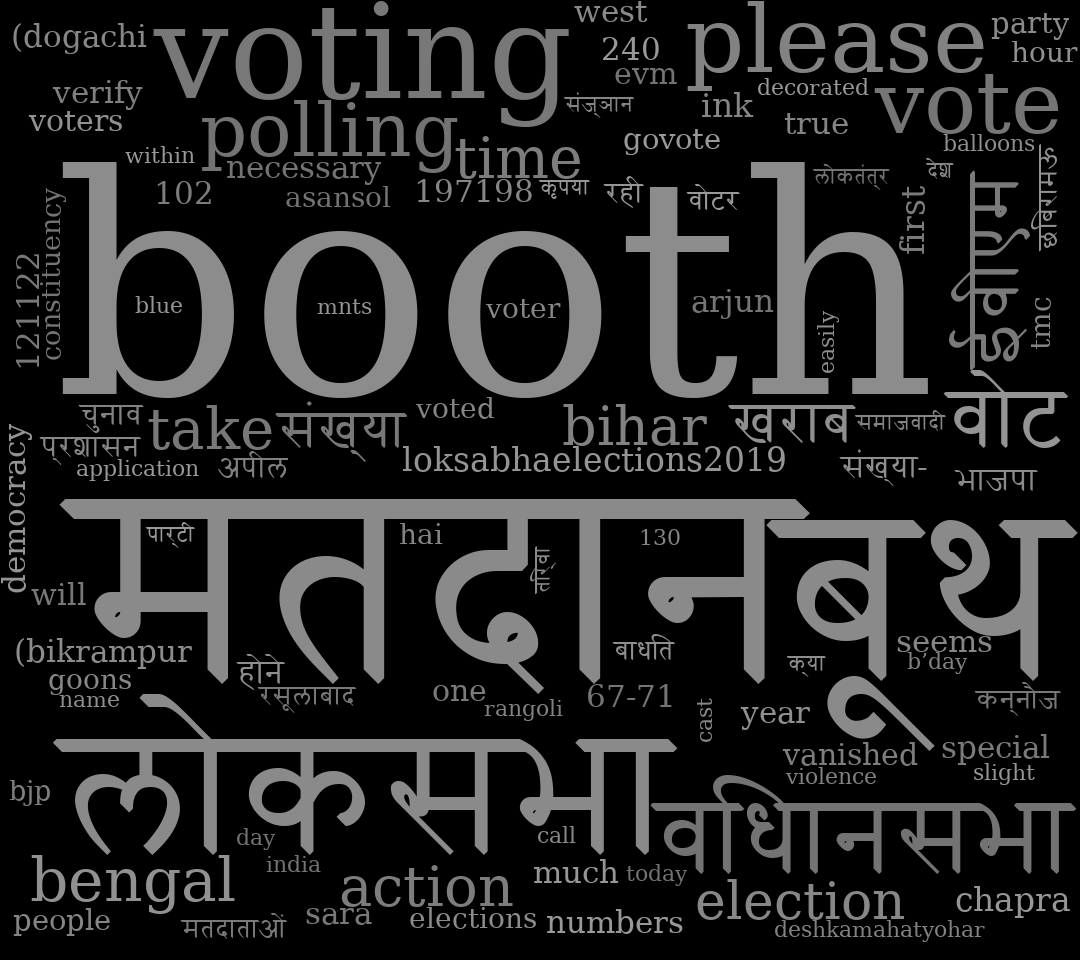

In [14]:
wordcloud.to_image()